# Kelvins Notebook


### Data shapes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


In [2]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from IPython import display

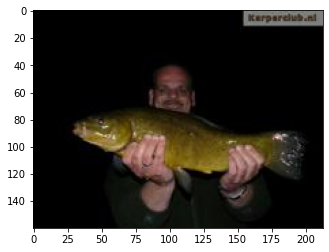

In [3]:
image = plt.imread('tinyMorph/raw_data/imagenette2-160/train/n01440764/ILSVRC2012_val_00024235.JPEG')
fig, ax = plt.subplots()
im = ax.imshow(image)

plt.show()

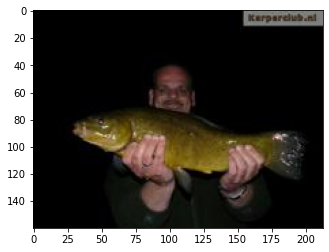

In [4]:
image = plt.imread('tinyMorph/raw_data/imagenette2-160/train/n01440764/ILSVRC2012_val_00024235.JPEG')
plt.imshow(image);

In [5]:
import argparse
import numpy as np
import os
import imutils
import cv2
import random



def image_resize(image, width = None, height = None, max = None):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    if max is not None:
    	if w > h:
    		# produce
    		r = max / float(w)
    		dim = (max, int(h * r))
    	elif h > w:
    		r = max / float(h)
    		dim = (int(w * r), max)
    	else :
    		dim = (max, max)

    else: 
	    # if both the width and height are None, then return the
	    # original image
	    if width is None and height is None:
	        return image

	    # check to see if the width is None
	    if width is None:
	        # calculate the ratio of the height and construct the
	        # dimensions
	        r = height / float(h)
	        dim = (int(w * r), height)

	    # otherwise, the height is None
	    else:
	        # calculate the ratio of the width and construct the
	        # dimensions
	        r = width / float(w)
	        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim)

    # return the resized image
    return resized

In [6]:
image = image_resize(image, max= 64)

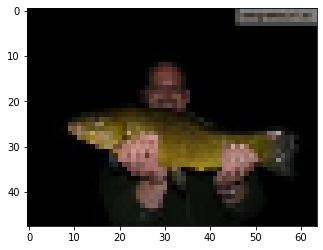

In [7]:
plt.imshow(image);

In [8]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [9]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [10]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [65]:
content_path = ('4698 Medium.jpeg')
style_path = ('istockphoto-1276580714-170667a.jpeg')

In [66]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [67]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

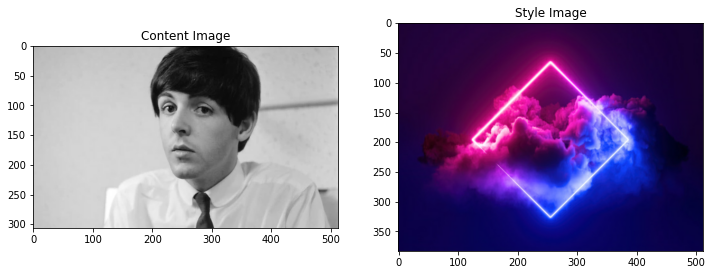

In [68]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

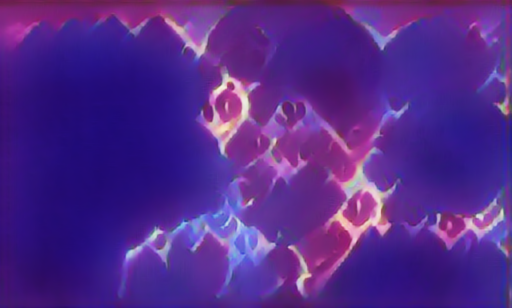

In [69]:
import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)


In [70]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

In [71]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)


input_10
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [72]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [73]:
def vgg_layers(layer_names):
  
  # Load our model. Load pretrained VGG, trained on imagenet data
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]

    model = tf.keras.Model([vgg.input], outputs)
    return model

In [74]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
    print(name)
    print("  shape: ", output.numpy().shape)
    print("  min: ", output.numpy().min())
    print("  max: ", output.numpy().max())
    print("  mean: ", output.numpy().mean())
    print()

block1_conv1
  shape:  (1, 383, 512, 64)
  min:  0.0
  max:  844.2743
  mean:  26.550287

block2_conv1
  shape:  (1, 191, 256, 128)
  min:  0.0
  max:  3108.1084
  mean:  109.89882

block3_conv1
  shape:  (1, 95, 128, 256)
  min:  0.0
  max:  6065.0947
  mean:  96.1677

block4_conv1
  shape:  (1, 47, 64, 512)
  min:  0.0
  max:  14710.904
  mean:  369.9376

block5_conv1
  shape:  (1, 23, 32, 512)
  min:  0.0
  max:  2273.988
  mean:  28.269838



In [75]:
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

In [76]:
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
    
        inputs = inputs*255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

        style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

        content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

        style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}

In [77]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())
    print()

print("Contents:")
for name, output in sorted(results['content'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0
    max:  69259.516
    mean:  267.24426

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  99477.97
    mean:  7094.293

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  151787.19
    mean:  5579.511

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  2193984.5
    mean:  87473.03

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  97983.49
    mean:  771.98584

Contents:
   block5_conv2
    shape:  (1, 19, 32, 512)
    min:  0.0
    max:  1273.0317
    mean:  10.010946


In [78]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [79]:
image = tf.Variable(content_image)

In [80]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [81]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [82]:
style_weight=1e-1
content_weight=1e4

In [83]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [84]:
@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = style_content_loss(outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

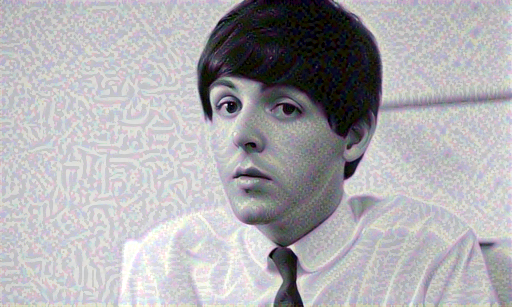

In [85]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

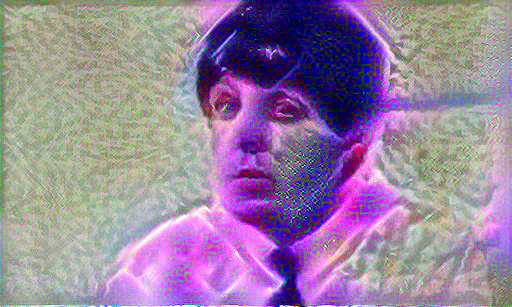

Train step: 250
Total time: 757.9


In [156]:
import time
start = time.time()

epochs = 5
steps_per_epoch = 50

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
        print(".", end='', flush=True)
    display.clear_output(wait=True)
    display.display(tensor_to_image(image))
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

### resized func

In [107]:
def resize(image, height, width):
    image_resize = tf.image.resize(image, [height,width])
    plt.imshow(image_resize[0])

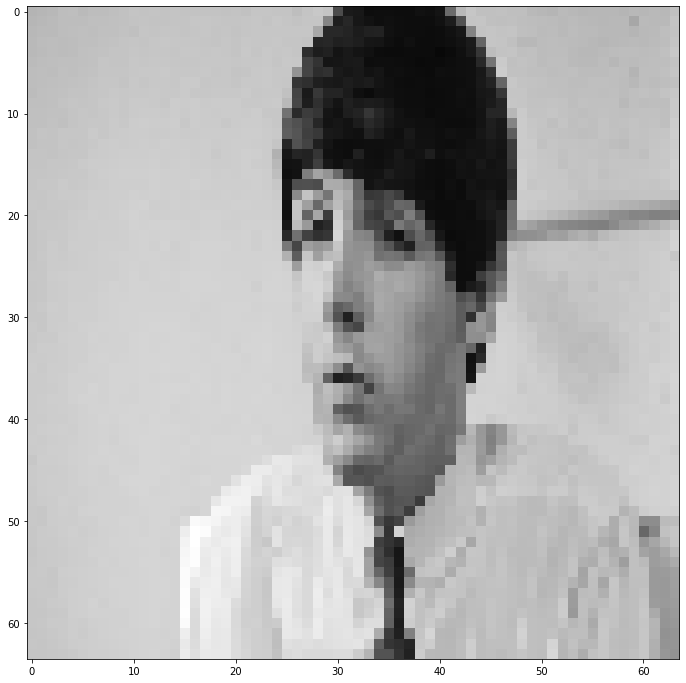

In [108]:
resize(content_image, 64,64)

### image crop 

In [112]:
def crop(image, fraction):
    image_crop= tf.image.central_crop(
    content_image, central_fraction= fraction
    )
    plt.imshow(image_crop[0])

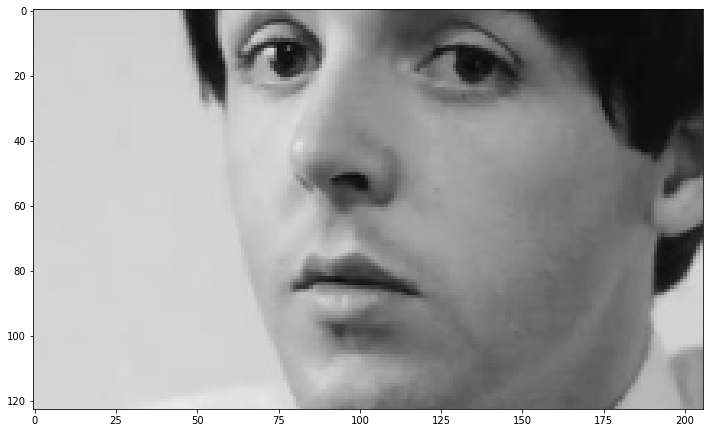

In [118]:
crop(content_image, 0.4)

### image flip horizontal

In [146]:
def image_flip_hor(image):
    image_flip = tf.image.flip_left_right(image)
    plt.imshow(image_flip[0])

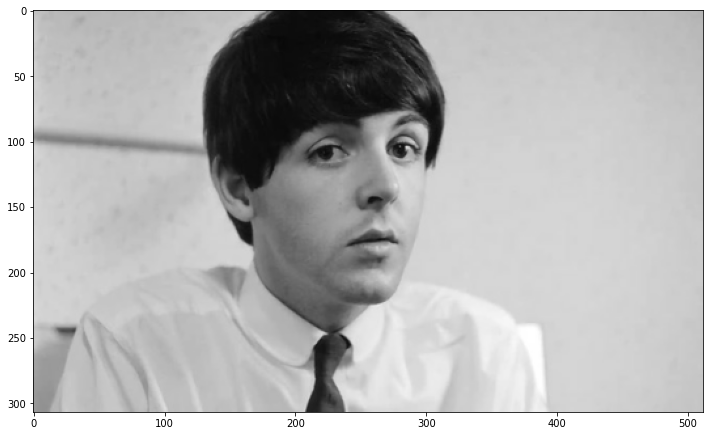

In [147]:
image_flip_hor(content_image)

### image_square

In [131]:
def image_sq(image, width, height, method='bilinear',antialias=True):
    image_sq= tf.image.resize_with_pad(
    image,
    width,
    height
    )
    plt.imshow(image_sq[0])

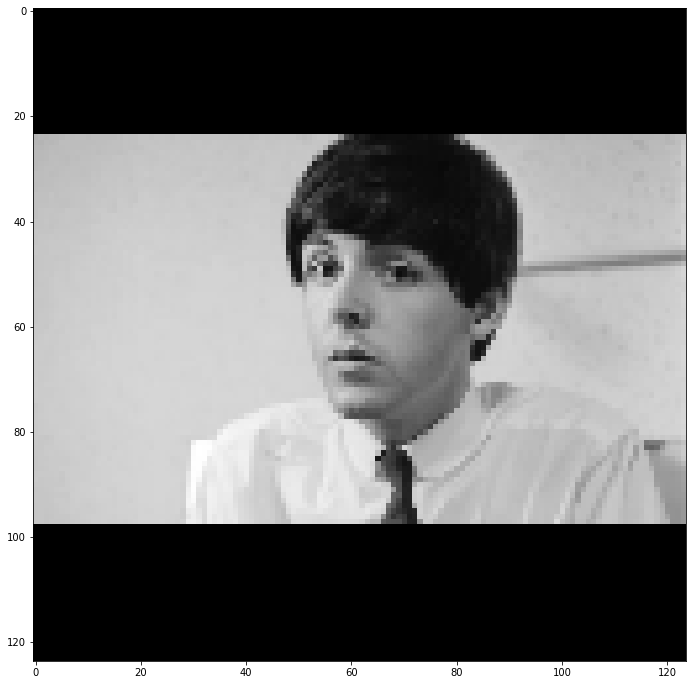

In [135]:
image_sq(content_image, 124,124)

### image flip up


In [149]:
def image_flip_hor(image):
    image_flip = tf.image.flip_up_down(image)
    plt.imshow(image_flip[0])

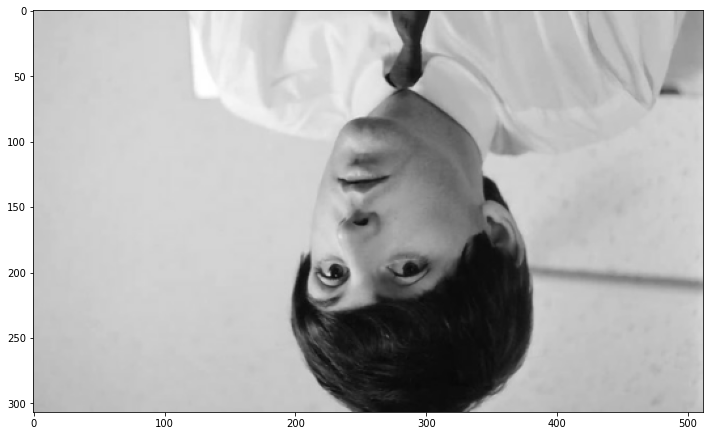

In [150]:
image_flip_hor(content_image)

### gaussian blur


In [154]:
content_image.shape

TensorShape([1, 307, 512, 3])

In [155]:
tf.image.grayscale_to_rgb(
    content_image, name=None
)

ValueError: Last dimension of a grayscale image should be size 1.